In [1]:
#hello

In [2]:
! rio clip --help

Usage: rio clip [OPTIONS] INPUT OUTPUT

  Clips a raster using projected or geographic bounds.

  The values of --bounds are presumed to be from the coordinate reference
  system of the input dataset unless the --geographic option is used, in which
  case the values may be longitude and latitude bounds. Either JSON, for
  example "[west, south, east, north]", or plain text "west south east north"
  representations of a bounding box are acceptable.

  If using --like, bounds will automatically be transformed to match the
  coordinate reference system of the input.

  Datasets with non-rectilinear geo transforms (i.e. with rotation and/or
  shear) may not be cropped using this command. They must be processed with
  rio-warp.

  Examples -------- $ rio clip input.tif output.tif --bounds xmin ymin xmax
  ymax

  $ rio clip input.tif output.tif --like template.tif

Options:
  -o, --output PATH               Path to output file (optional alternative to
                                  a pos

# Goals

- play with --co --profile
- play with $ rio clip input.tif output.tif --like template.tif

- get rio bounding box from geojson
- use fspec ls

In [3]:
import fsspec

In [4]:
help(fsspec)

Help on package fsspec:

NAME
    fsspec

PACKAGE CONTENTS
    _version
    archive
    asyn
    caching
    callbacks
    compression
    config
    conftest
    core
    dircache
    exceptions
    fuse
    generic
    gui
    implementations (package)
    mapping
    parquet
    registry
    spec
    transaction
    utils

CLASSES
    asyncio.exceptions.TimeoutError(builtins.Exception)
        fsspec.exceptions.FSTimeoutError
    builtins.object
        fsspec.callbacks.Callback
        fsspec.spec.AbstractFileSystem
    collections.abc.MutableMapping(collections.abc.Mapping)
        fsspec.mapping.FSMap
    
    class AbstractFileSystem(builtins.object)
     |  AbstractFileSystem(*args, **kwargs)
     |  
     |  An abstract super-class for pythonic file-systems
     |  
     |  Implementations are expected to be compatible with or, better, subclass
     |  from here.
     |  
     |  Methods defined here:
     |  
     |  __dask_tokenize__(self)
     |  
     |  __eq__(self, other

In [5]:
fs = fsspec.filesystem('s3')

In [6]:
f = fs.ls('/ws-in/ssebop/ndvi/2012/')

In [7]:
f

['ws-in/ssebop/ndvi/2012/',
 'ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tfw',
 'ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif.aux.xml',
 'ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif.ovr',
 'ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif.vat.cpg',
 'ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif.vat.dbf',
 'ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif.xml',
 'ws-in/ssebop/ndvi/2012/2012012.1_km_VIIRS_NDVI.tfw',
 'ws-in/ssebop/ndvi/2012/2012012.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012012.1_km_VIIRS_NDVI.tif.aux.xml',
 'ws-in/ssebop/ndvi/2012/2012012.1_km_VIIRS_NDVI.tif.ovr',
 'ws-in/ssebop/ndvi/2012/2012012.1_km_VIIRS_NDVI.tif.vat.cpg',
 'ws-in/ssebop/ndvi/2012/2012012.1_km_VIIRS_NDVI.tif.vat.dbf',
 'ws-in/ssebop/ndvi/2012/2012012.1_km_VIIRS_NDVI.tif.xml',
 'ws-in/ssebop/ndvi/2012/2012013.1_km_VIIRS_NDVI.tfw',
 'ws-in/ssebop/ndvi/2012/2012013.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/201

In [8]:
f = [image for image in f if image.endswith(".tif")]

In [9]:
f

['ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012012.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012013.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012021.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012022.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012023.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012031.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012032.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012033.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012041.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012042.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012043.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012051.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012052.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012053.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012061.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012062.1_km_VIIRS_NDVI.tif',
 'ws-in/ssebop/ndvi/2012/2012063.1_km_VIIRS_NDVI.tif',
 'ws-in/ss

In [10]:
f[0]

'ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif'

In [11]:
import geopandas as gpd

In [12]:
gdf = gpd.read_file('USA.geojson')

In [13]:
gdf

,geometry
0,"POLYGON ((-126.92508 50.32600, -126.92508 24.7..."


In [14]:
dir(gdf.geometry)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '

In [15]:
gdf.geometry.bounds['minx'][0]

-126.92507546294439

In [16]:
gdf.geometry.bounds['maxx'][0]

-67.59642214329399

In [17]:
gdf.geometry.bounds['miny'][0], gdf.geometry.bounds['maxy'][0]

(24.70939741041829, 50.32599881178945)

In [18]:
minx = gdf.geometry.bounds['minx'][0]
maxx = gdf.geometry.bounds['maxx'][0]
miny = gdf.geometry.bounds['miny'][0]
maxy = gdf.geometry.bounds['maxy'][0]

In [19]:
input = f[0]
output = '/wsefs/tony/ndviusa_example.tif'

In [20]:
cmd = f'rio clip s3://{input} {output} {minx} {miny} {maxx} {maxy}'

In [21]:
cmd

'rio clip s3://ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif /wsefs/tony/ndviusa_example.tif -126.92507546294439 24.70939741041829 -67.59642214329399 50.32599881178945'

In [22]:
! rio clip s://ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif /wsefs/tony/ndviusa_example.tif --bounds "-126.92507546294439 24.70939741041829 -67.59642214329399 50.32599881178945"

Error: Could not open file '': file exists and won't be overwritten without use of the `--overwrite` option.


In [23]:
! ls /wsefs/tony/

better_copy_raster.tif	copy_raster.tif      output2.tif
copy_raster		ndviusa_example.tif


In [24]:
! rio clip s3://ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif /wsefs/tony/ndviusa_example.tif --geographic --bounds  "-126.92507546294439 24.70939741041829 -67.59642214329399 50.32599881178945"

Error: Could not open file '': file exists and won't be overwritten without use of the `--overwrite` option.


In [25]:
! ls -lh /wsefs/tony

total 140M
-rw-rw-r-- 1 ec2-user ec2-user 32M Nov 16 22:09 better_copy_raster.tif
-rw-rw-r-- 1 ec2-user ec2-user 32M Nov 16 21:49 copy_raster
-rw-rw-r-- 1 ec2-user ec2-user 32M Nov 16 22:09 copy_raster.tif
-rw-rw-r-- 1 ec2-user ec2-user 24M Nov 16 21:38 ndviusa_example.tif
-rw-rw-r-- 1 ec2-user ec2-user 24M Nov 16 22:06 output2.tif


In [26]:
import rasterio

rasterio.__version__


in_img = '/wsefs/tony/ndviusa_example.tif'

ds = rasterio.open(in_img)

my_data = ds.read()


ds.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 6147,
 'height': 2654,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00965199194334817, 0.0, -126.92507546294439,
        0.0, -0.00965199194334817, 50.32599881178945)}

In [27]:
ds.name

'/wsefs/tony/ndviusa_example.tif'

In [28]:
ds.count

1

In [29]:
ds.shape

(2654, 6147)

In [30]:
ds.width

6147

In [31]:
ds.height

2654

In [32]:
ds.driver

'GTiff'

In [33]:
ds.crs

CRS.from_epsg(4326)

In [34]:
ds.transform

Affine(0.00965199194334817, 0.0, -126.92507546294439,
       0.0, -0.00965199194334817, 50.32599881178945)

In [35]:
#my_data.description

In [36]:
my_data.size/1e6

16.314138

In [37]:
my_data.size

16314138

In [38]:
my_data.dtype

dtype('int16')

In [39]:
type(my_data)

numpy.ndarray

In [40]:
type(ds)

rasterio.io.DatasetReader

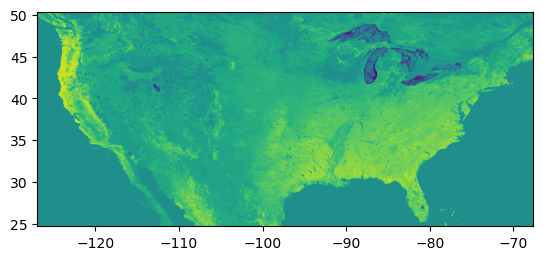

<AxesSubplot: >

In [41]:
from rasterio.plot import show

show (ds)

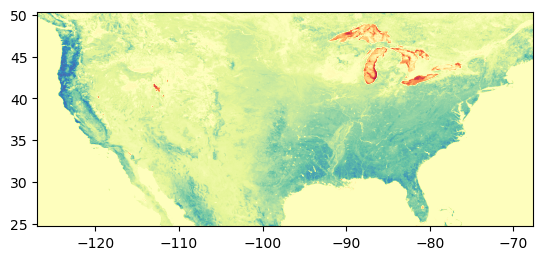

<AxesSubplot: >

In [42]:
show (ds, cmap='Spectral')

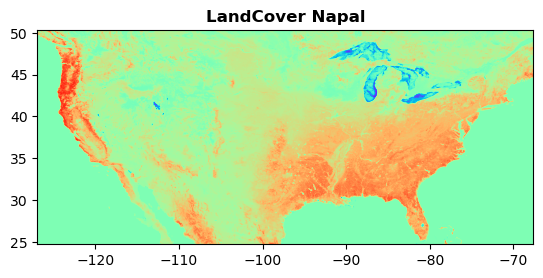

<AxesSubplot: title={'center': 'LandCover Napal'}>

In [43]:
show(ds, cmap='rainbow', title="LandCover Napal")

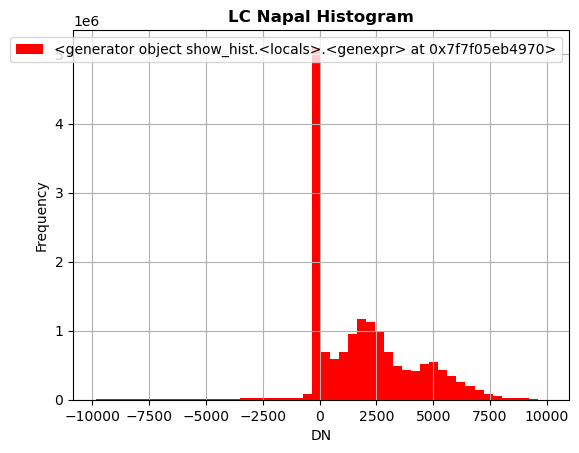

In [44]:
from rasterio.plot import show_hist

show_hist(ds, bins=50, title='LC Napal Histogram')

In [45]:
with rasterio.open('/wsefs/tony/copy_raster.tif', 'w',
        driver = ds.driver,
        height = ds.height,
        width = ds.width,
        count = ds.count,
        crs = ds.crs,
        transform = ds.transform,
        dtype = my_data.dtype,
) as dst:
        dst.write(my_data)
my_data.size

16314138

In [46]:
! ls -l /wsefs/tony/

total 143352
-rw-rw-r-- 1 ec2-user ec2-user 32644346 Nov 16 22:09 better_copy_raster.tif
-rw-rw-r-- 1 ec2-user ec2-user 32644566 Nov 16 21:49 copy_raster
-rw-rw-r-- 1 ec2-user ec2-user 32644566 Nov 16 22:12 copy_raster.tif
-rw-rw-r-- 1 ec2-user ec2-user 24426213 Nov 16 21:38 ndviusa_example.tif
-rw-rw-r-- 1 ec2-user ec2-user 24426213 Nov 16 22:06 output2.tif


In [47]:
! rio info /wsefs/tony/copy_raster.tif | jq

{
  "blockysize": 1,
  "bounds": [
    -126.92507546294439,
    24.7096121941434,
    -67.59428098718318,
    50.32599881178945
  ],
  "colorinterp": [
    "gray"
  ],
  "count": 1,
  "crs": "EPSG:4326",
  "descriptions": [
    null
  ],
  "driver": "GTiff",
  "dtype": "int16",
  "height": 2654,
  "indexes": [
    1
  ],
  "interleave": "band",
  "lnglat": [
    -97.2596782250638,
    37.517805502966425
  ],
  "mask_flags": [
    [
      "all_valid"
    ]
  ],
  "nodata": null,
  "res": [
    0.00965199194334817,
    0.00965199194334817
  ],
  "shape": [
    2654,
    6147
  ],
  "tiled": false,
  "transform": [
    0.00965199194334817,
    0,
    -126.92507546294439,
    0,
    -0.00965199194334817,
    50.32599881178945,
    0,
    0,
    1
  ],
  "units": [
    null
  ],
  "width": 6147
}


In [48]:
! rio info /wsefs/tony/ndviusa_example.tif | jq

{
  "blockxsize": 128,
  "blockysize": 128,
  "bounds": [
    -126.92507546294439,
    24.7096121941434,
    -67.59428098718318,
    50.32599881178945
  ],
  "colorinterp": [
    "gray"
  ],
  "compress": "lzw",
  "count": 1,
  "crs": "EPSG:4326",
  "descriptions": [
    null
  ],
  "driver": "GTiff",
  "dtype": "int16",
  "height": 2654,
  "indexes": [
    1
  ],
  "interleave": "band",
  "lnglat": [
    -97.2596782250638,
    37.517805502966425
  ],
  "mask_flags": [
    [
      "nodata"
    ]
  ],
  "nodata": -32768,
  "res": [
    0.00965199194334817,
    0.00965199194334817
  ],
  "shape": [
    2654,
    6147
  ],
  "tiled": true,
  "transform": [
    0.00965199194334817,
    0,
    -126.92507546294439,
    0,
    -0.00965199194334817,
    50.32599881178945,
    0,
    0,
    1
  ],
  "units": [
    null
  ],
  "width": 6147
}


In [49]:
! rio info s3://ws-in/ssebop/ndvi/2012/2012011.1_km_VIIRS_NDVI.tif | jq

{
  "blockxsize": 128,
  "blockysize": 128,
  "bounds": [
    -179.99999550299998,
    -60.002258556499925,
    180.0000000000001,
    79.99988458176529
  ],
  "colorinterp": [
    "gray"
  ],
  "compress": "lzw",
  "count": 1,
  "crs": "EPSG:4326",
  "descriptions": [
    "Band_1"
  ],
  "driver": "GTiff",
  "dtype": "int16",
  "height": 14505,
  "indexes": [
    1
  ],
  "interleave": "band",
  "lnglat": [
    2.248500067025816e-06,
    9.99881301263268
  ],
  "mask_flags": [
    [
      "nodata"
    ]
  ],
  "nodata": -32768,
  "res": [
    0.00965199194334817,
    0.00965199194334817
  ],
  "shape": [
    14505,
    37298
  ],
  "tiled": true,
  "transform": [
    0.00965199194334817,
    0,
    -179.99999550299998,
    0,
    -0.00965199194334817,
    79.99988458176529,
    0,
    0,
    1
  ],
  "units": [
    null
  ],
  "width": 37298
}


In [50]:
ds.profile

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 6147, 'height': 2654, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00965199194334817, 0.0, -126.92507546294439,
       0.0, -0.00965199194334817, 50.32599881178945), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

In [51]:
with rasterio.open('/wsefs/tony/better_copy_raster.tif', 'w',
        profile = ds.profile,
        height = ds.height,
        width = ds.width,
        count = 1,
        dtype = my_data.dtype
) as dst:
        dst.write(my_data)
my_data.size

/wsefs/miniconda3/envs/ssebop-study/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


16314138

In [52]:
! ls -l /wsefs/tony

total 143352
-rw-rw-r-- 1 ec2-user ec2-user 32644346 Nov 16 22:12 better_copy_raster.tif
-rw-rw-r-- 1 ec2-user ec2-user 32644566 Nov 16 21:49 copy_raster
-rw-rw-r-- 1 ec2-user ec2-user 32644566 Nov 16 22:12 copy_raster.tif
-rw-rw-r-- 1 ec2-user ec2-user 24426213 Nov 16 21:38 ndviusa_example.tif
-rw-rw-r-- 1 ec2-user ec2-user 24426213 Nov 16 22:06 output2.tif


In [53]:
like = '/wsefs/tony/ndviusa_example.tif'

In [63]:
output2 = '/wsefs/tony/output2b.tif'
cmd = f'rio clip s3://{f[15]} {output2} --like {like}'

In [64]:
cmd

'rio clip s3://ws-in/ssebop/ndvi/2012/2012061.1_km_VIIRS_NDVI.tif /wsefs/tony/output2b.tif --like /wsefs/tony/ndviusa_example.tif'

In [65]:
!rio clip s3://ws-in/ssebop/ndvi/2012/2012061.1_km_VIIRS_NDVI.tif /wsefs/tony/output2b.tif --like /wsefs/tony/ndviusa_example.tif

In [57]:
!ls -l /wsefs/tony

total 143352
-rw-rw-r-- 1 ec2-user ec2-user 32644346 Nov 16 22:12 better_copy_raster.tif
-rw-rw-r-- 1 ec2-user ec2-user 32644566 Nov 16 21:49 copy_raster
-rw-rw-r-- 1 ec2-user ec2-user 32644566 Nov 16 22:12 copy_raster.tif
-rw-rw-r-- 1 ec2-user ec2-user 24426213 Nov 16 21:38 ndviusa_example.tif
-rw-rw-r-- 1 ec2-user ec2-user 24426213 Nov 16 22:06 output2.tif


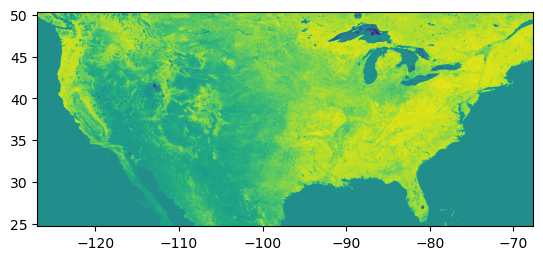

<AxesSubplot: >

In [66]:
in_img = '/wsefs/tony/output2b.tif'

ds2 = rasterio.open(in_img)

show(ds2)


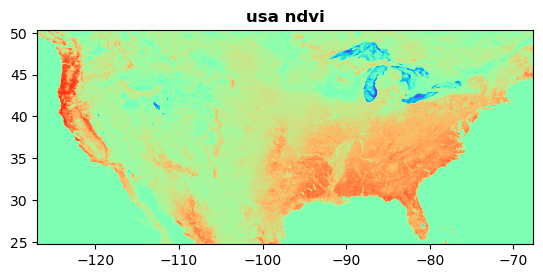

<AxesSubplot: title={'center': 'usa ndvi'}>

In [67]:
show(ds, cmap='rainbow', title="usa ndvi")

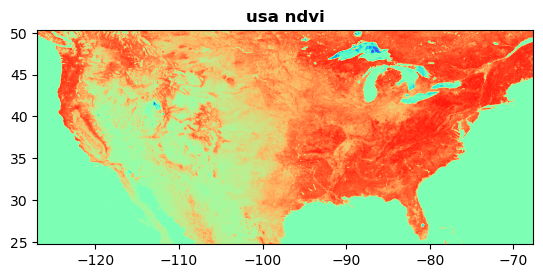

<AxesSubplot: title={'center': 'usa ndvi'}>

In [68]:
show(ds2, cmap='rainbow', title="usa ndvi")

### https://matplotlib.org/stable/tutorials/colors/colormaps.html

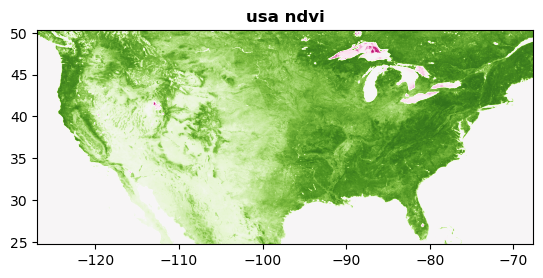

<AxesSubplot: title={'center': 'usa ndvi'}>

In [76]:
show(ds2, cmap='PiYG', title="usa ndvi")

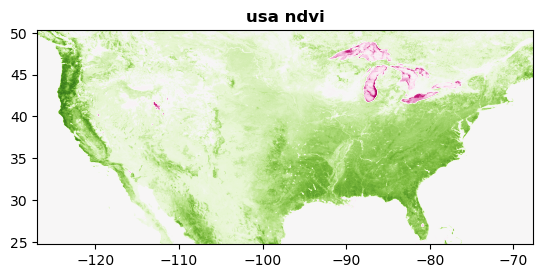

<AxesSubplot: title={'center': 'usa ndvi'}>

In [78]:
show(ds, cmap='PiYG', title="usa ndvi")